# Scituffy Data Science 
Esplora la Potenza dell'Algoritmo ad Albero Decisionale: Una Guida Completa al Classificatore a Albero Decisionale

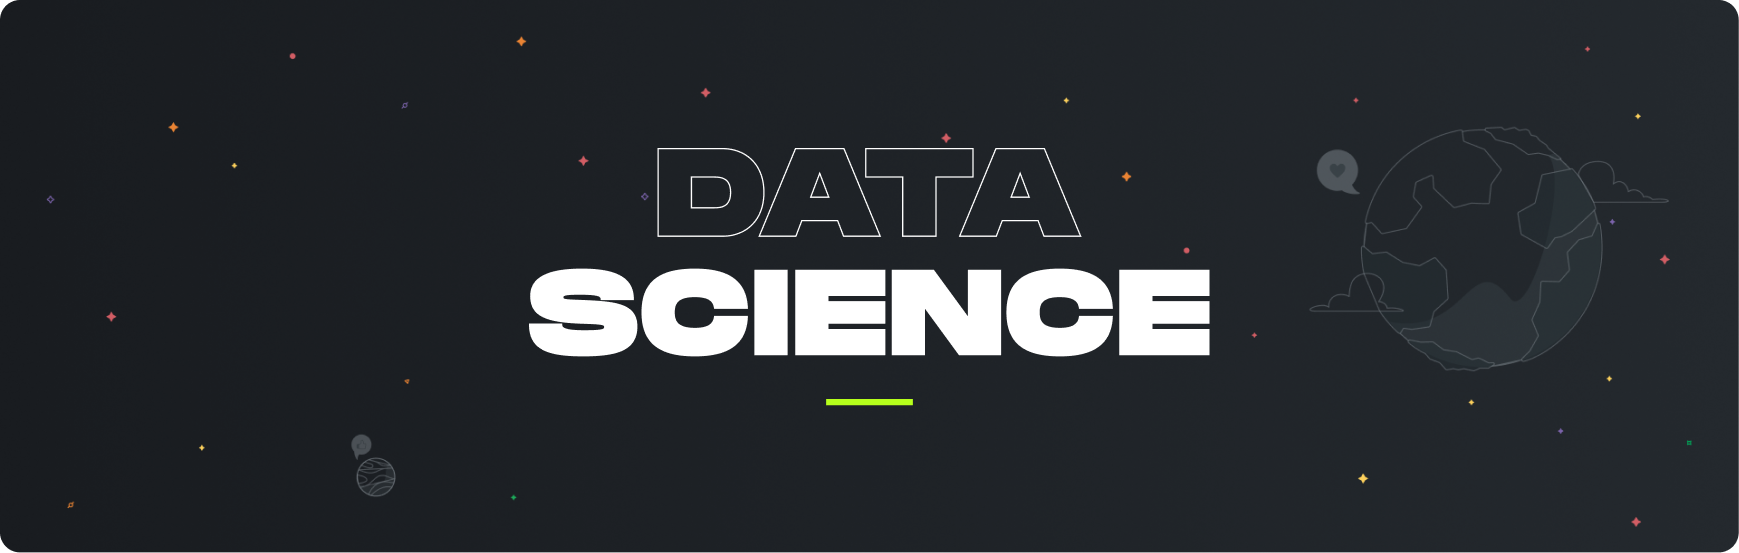



# **Decision Tree Classifier** • Impariamo ad addestrare gli algoritmi

##### *Introduzione:*
Il classificatore a albero decisionale è uno dei concetti più potenti e popolari nell'ambito dell'apprendimento automatico e dell'intelligenza artificiale. Questo algoritmo offre un approccio intuitivo e altamente interpretabile alla classificazione dei dati, rendendolo una scelta ideale per una vasta gamma di applicazioni. Questa guida completa esplorerà i fondamenti, le applicazioni e le best practice associate al classificatore a albero decisionale.
Oggi impariamo come creare un intero modello di albero decisionale per algoritmi di classificazione

🐋 Accessare la pagina del progetto [cliccando qui](https://www.notion.so/enzoschitini/Decision-Tree-Classifier-Impariamo-ad-addestrare-gli-algoritmi-3951d294bf36438ca6905284e5382455?pvs=4)

📕 [Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## Importando risorsi e i dati

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

- Banche dati

In [50]:
df = sns.load_dataset('titanic')
df = df.drop_duplicates()

In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [53]:
df.reset_index(drop=True, inplace=True)

In [55]:
percentage = round(((df.isnull().sum() / len(df)) * 100), 2)
percentage

survived        0.00
pclass          0.00
sex             0.00
age            13.52
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.26
class           0.00
who             0.00
adult_male      0.00
deck           74.23
embark_town     0.26
alive           0.00
alone           0.00
dtype: float64

In [59]:
# Rimuovere tutte le colonne che hanno dati nulli
df.dropna(axis=1, inplace=True)
print(round(((df.isnull().sum() / len(df)) * 100), 2))

survived      0.0
pclass        0.0
sex           0.0
sibsp         0.0
parch         0.0
fare          0.0
class         0.0
who           0.0
adult_male    0.0
alive         0.0
alone         0.0
dtype: float64


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   class       784 non-null    category
 7   who         784 non-null    object  
 8   adult_male  784 non-null    bool    
 9   alive       784 non-null    object  
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 51.6+ KB


## Trasformazione delle variabili in Dimmies